# Gradient Descent

Now that we have a _reasonable_ gradient vs the cut, lets use JAX to simply walk and find the zero of this function so we can find the "exact" maximum.

In [3]:
import jax
import jax.numpy as jnp
import numpy
import matplotlib.pyplot as plt
from jax_helpers import sig_sqrt_b

_ = plt.ion()

Our gradient is very very simple - no need to re-evaluate it every time around - there are no if statements, etc., in it that one might need to deal with each time. So we can evaluate it once.

In [4]:
grad = jax.grad(sig_sqrt_b)

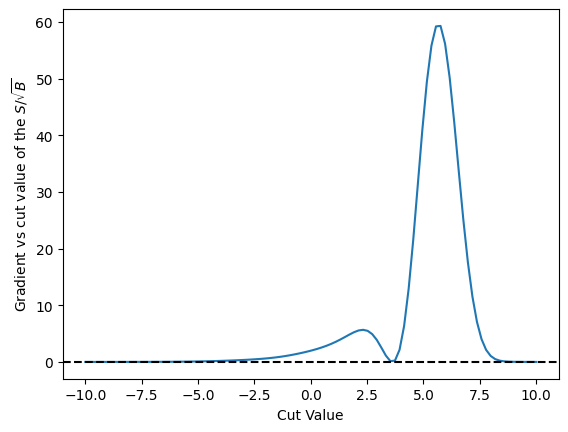

In [8]:
cut_values = numpy.linspace(-10.0, 10.0, 100)
plt.plot(cut_values, numpy.array([grad(c)**2 for c in cut_values]))
plt.xlabel('Cut Value')
plt.ylabel(r'Gradient vs cut value of the $S/\sqrt{B}$')
plt.axhline(0.0, color='black', linestyle='dashed')
plt.show()

This does not look like a likelihood curve, sadly - so in order to help out any simplistic thing we code up here, we are going to just limit our cut_value a bit better, and then use that as the place to start our grad descent algorithm.

This is just relying on the idea we will have a likelihood that is well behaved and doesn't have local minima.

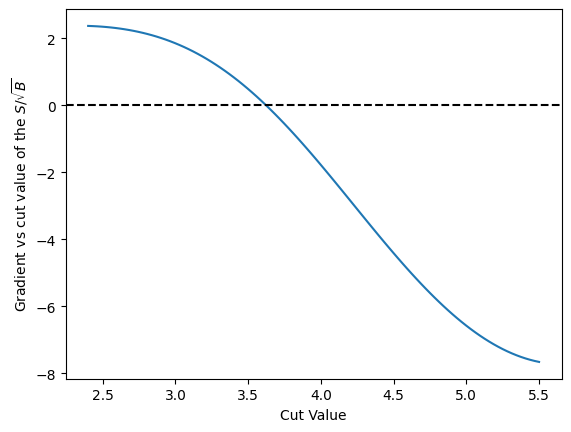

In [13]:
cut_values = numpy.linspace(2.4, 5.5, 100)
plt.plot(cut_values, numpy.array([grad(c) for c in cut_values]))
plt.xlabel('Cut Value')
plt.ylabel(r'Gradient vs cut value of the $S/\sqrt{B}$')
plt.axhline(0.0, color='black', linestyle='dashed')
plt.show()

## Gradient Descent Loop

In [45]:
LEARNING_RATE = 0.06

def update_cut(c: float):
    'Run one iteration of the loop, and return a new cut value'

    g_value = grad(c)
    return c + g_value * LEARNING_RATE

In [46]:
c = 5.45
values = []
losses = []
loss = -1.0
for count in range(0, 50):
    loss = sig_sqrt_b(c)
    values.append(c)
    losses.append(loss)
    c = update_cut(c)
print(f'final cut is {c} with loss {loss}')

final cut is 3.624483346939087 with loss 20.89632797241211


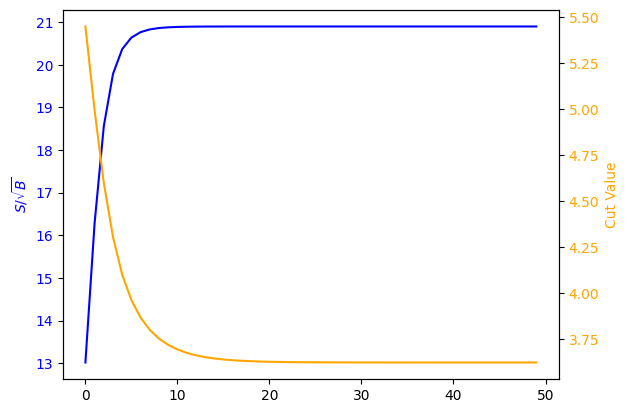

In [47]:
fig, ax1 = plt.subplots() 

ax1.plot (range(0,50), losses, label=r'$S/\sqrt{B}$', color='blue')
ax1.set_ylabel(r'$S/\sqrt{B}$', color='blue')
ax1.tick_params(axis ='y', labelcolor = 'blue')
ax2 = ax1.twinx()
ax2.set_ylabel('Cut Value', color='orange')
ax2.plot (range(0, 50), values, label='Cut Value', color='orange')
ax2.tick_params(axis ='y', labelcolor = 'orange')
plt.xlabel('Training Iteration')
plt.show()

Ok - looks like it is basically done by 20 training iterations for that learning rate.